In [1]:
using Cubature

In [2]:
function R(n::Int64, m::Int64, ρ::Float64)
    if (n - m) % 2 != 0
        0
    else
        function summand(k)
            n = big(n)
            k = big(k)
            (-1)^k * factorial(n-k)/(factorial(k)*factorial(Int((n+m)/2) - k)*factorial(Int((n-m)/2) - k))*(ρ)^(n-2*k)
        end
        mapreduce(summand, +, Array(range(0, stop=Int((n-m)/2), step=1)))
    end
end

function Z(n, m, ρ, θ)
    if m < 0
        R(n, abs(m), ρ) * sin(abs(m) * θ)
    else
        R(n, m, ρ) * cos(m * θ)
    end
end

Z (generic function with 1 method)

In [7]:
σ1 = .1
σ2 = .1
function integrand(n, m)
    function rtn(coor)
        ρ = coor[1]
        θ = coor[2]
        x = ρ * cos(θ)
        y = ρ * sin(θ)
        Z(n, m, ρ, θ) * exp(-x^2/σ1^2 - y^2/σ2^2) * ρ
    end
    rtn
end

integrand (generic function with 1 method)

In [8]:
maxn=15
coeffs = [[hcubature(integrand(n, m), [0., 0.], [1., 2*π], maxevals=10000) for m in range(-n, n, step=1)] for n in range(0, maxn, step=1)];

In [9]:
coeffs_first = [(sum([c[1]^2 for c in coeff]), sum([c[2]^2 for c in coeff])) for coeff in coeffs]

16-element Array{Tuple{Float64,Float64},1}:
 (0.0009869604401247557, 6.124640488987859e-20)
 (1.4569740855476242e-31, 6.93140805123397e-21)
 (0.0009478768066955898, 7.722136134888957e-20)
 (7.119275370507174e-32, 1.4237195141550413e-21)
 (0.000874306248847569, 6.973088574332816e-20)
 (4.147368220435414e-31, 9.363419315454837e-20)
 (0.0007745501447093294, 4.370437794828632e-20)
 (1.826717988411959e-26, 8.538084280858023e-19)
 (0.0006590703922410905, 6.598550781197344e-20)
 (5.0332438134346574e-26, 3.121292045269467e-18)
 (0.000538690873335463, 5.112858642120593e-20)
 (5.748591143537672e-28, 7.771436117249456e-18)
 (0.0004229697753533816, 4.2126696062418914e-20)
 (3.2597901775891144e-26, 1.4949591726252053e-17)
 (0.0003190687463019814, 6.253526104421616e-20)
 (1.220967526957669e-25, 2.9485659151881945e-17)

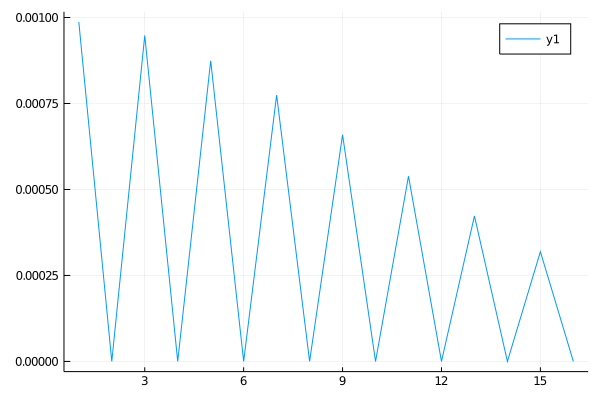

In [10]:
using Plots
plot([c[1] for c in coeffs_first])